<a href="https://colab.research.google.com/github/chacha86/pythonai2/blob/main/%EC%88%99%EB%B0%95%EB%A3%8C_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
# 데이터 설명
# id: 일련번호
# name: AirBnB 이름
# host_id: 호스트 ID
# host_name: 호스트 성명
# neighbourhood_group: 지구명
# neighbourhood : 지역명
# latitude: 위도
# longitude: 경도
# room_type: 방 타입
# price: 가격
# minimum_nights: 최소 숙박일수
# number_of_reviews: 리뷰 개수
# last_review: 최근 리뷰 일자
# reviews_per_month: 월 평균 리뷰 수
# calculated_host_listings_count:  호스트에게 대여 가능한 에어비앤비의 총 개수
# availability_365: 1년 중 가능한 대여일


# 1. 데이터 로드
import pandas as pd

df = pd.read_csv('/content/AB_NYC_2019.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [146]:
# 2. 수치형데이터와 price 상관관계
df.corr()['price']


<ipython-input-146-cd243a88ae4f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


id                                0.010619
host_id                           0.015309
latitude                          0.033939
longitude                        -0.150019
price                             1.000000
minimum_nights                    0.042799
number_of_reviews                -0.047954
reviews_per_month                -0.030608
calculated_host_listings_count    0.057472
availability_365                  0.081829
Name: price, dtype: float64

<Axes: xlabel='neighbourhood_group'>

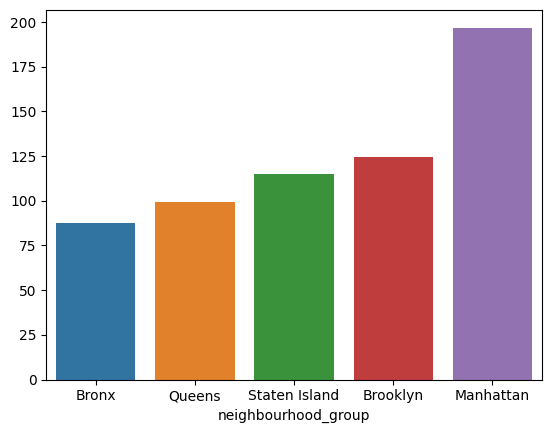

In [147]:

# 3. 범주형 데이터의 price 상관관계
## 범주와 수치와 관계 => 막대, 박스
## 수치와 수치 => 산점도, 선

df['neighbourhood_group']

### 막대그래프/박스 플롯 -> 범주, 수치
df['neighbourhood_group'].unique().size


### 지구별 평균 숙박료 가격
price_per_ngroup = df.groupby('neighbourhood_group')['price'].mean()

import matplotlib.pyplot as plt
import seaborn as sns

## 막대그래프를 그려서 지구별로 평균 숙박료가 올라가거나 내려가는 것을 확인(지구가 숙박료에 영향을 미친다고 생각할 수 있음)
sns.barplot(x=price_per_ngroup.index, y=price_per_ngroup.values, order=price_per_ngroup.sort_values().index)


In [148]:
### 범주가 너무 많아서 인코딩하기 힘든 컬럼(특성)을 처리하는 방법은 없을까?
counts = df['name'].value_counts()
idx = counts > 5

### 방법1. 샘플의 개수를 이용해 범주를 통합
### 예시) 30개 미만으로 언급되는 샘플들은 하나의 범주로 통합(etc, others 등)

### 방법2. 데이터의 성격을 이용해 범주를 통합
### 예시) 날짜의 경우 년-월-일에서 년-월로 값을 바꿔주면 날짜의 의미를 유지하면서도 범주가 많이 통합 된다.

use_names = counts[idx].index.values
use_names

def check_5times(name) :
  if name in use_names :
    return name
  return 'etc'

df['name'] = df['name'].map(check_5times)

In [149]:
## 몇개 이상?? -> 통계적으로 의미를 가지려면 최소 30 ~ 50개

## host_name, neighbourhood, last_review 범주의 수를 최대한 줄여보세요.
values = df['host_name'].value_counts()

x = list(range(values.size))
y = values

# sns.lineplot(x=x, y=y)
# plt.xlim(0, 200)


# train_cate['neighbourhood'].value_counts()
# train_cate['last_review'].value_counts()

idx = values >= 40

use_host_names = values[idx].index.values

def hname_5_times(hname):
  if hname in use_host_names :
    return hname
  return 'etc'

df['host_name'] = df['host_name'].map(hname_5_times)

In [150]:
##  neighbourhood 범주 통합
values = df['neighbourhood'].value_counts()

x = list(range(values.size))
y = values

# train_cate['neighbourhood'].value_counts()
# train_cate['last_review'].value_counts()

idx = values >= 500

use_neighbourshood = values[idx].index.values

def check_neighbour(neighbourhood):
  if neighbourhood in use_neighbourshood :
    return neighbourhood
  return 'etc'

df['neighbourhood'] = df['neighbourhood'].map(check_neighbour)

In [151]:
##  last_review 범주 통합
ddf = df.dropna(subset='last_review')
ddf['last_review'] = ddf['last_review'].str[:7]
# df.info()

<ipython-input-151-df4d69f36102>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['last_review'] = ddf['last_review'].str[:7]


In [152]:
# 4. 불필요해 보이는 컬럼 삭제
df2 = ddf.drop(['id', 'host_id'], axis=1)

In [153]:
# 5.데이터 클리닝
## 이상치 제거
### IQR 사용

# EDA
## 이상치 존재 여부 확인 및 처리 -> IQR 방식으로
##   -> IQR로 계산된 상한선과 하한선을 벗어난 데이터를 이상치로 처리하는 방법

Q1 = df2.quantile(0.25) # 1분위 값
Q3 = df2.quantile(0.75) # 3분위 값

IQR = Q3 - Q1 # IQR 계산

highest = Q3 + IQR * 1.5 # 상한선 계산
lowest = Q1 - IQR * 1.5 # 하한선 계산

## 로우의 이상치 여부 판별 함수
def is_not_outlier(row) :
  if row.sum() > 0 : # 이상치
    return False
  else : # 정상
    return True

tmp_df = (df2 > highest) | (df2 < lowest) # 데이터프레임의 값을 이상치 여부로 변환. (이상치는 False, 정상은 True)

normal_idx = tmp_df.apply(is_not_outlier, axis=1) # 이상치 여부 판별 함수를 적용하여 정상 데이터의 논리 인덱스만 걸러냄

df3 = df2.loc[normal_idx] # 논리 인덱싱을 이용해 정상 데이터만 추출

<ipython-input-153-dc1606a53822>:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df2.quantile(0.25) # 1분위 값
<ipython-input-153-dc1606a53822>:10: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df2.quantile(0.75) # 3분위 값
<ipython-input-153-dc1606a53822>:24: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  tmp_df = (df2 > highest) | (df2 < lowest) # 데이터프레임의 값을 이상치 여부로 변환. (이상치는 False, 정상은 True)


In [154]:
## 결측치 제거
df4 = df3.dropna()

In [155]:
# 6. 데이터 전처리
## 범주형 데이터 ont-hot 인코딩
## 수치형 데이터 표준화

### 문자형 숫자형 나누기
train_cate = df4.select_dtypes(include=['object'])
train_num = df4.select_dtypes(include=['int64', 'float64']).drop('price', axis=1)
target = df4['price']

train_cate_1hot = pd.get_dummies(train_cate)
train_cate_1hot.shape


(23459, 324)

In [189]:
### 다항회귀를 위한 피처 엔지니어링
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(train_num)
p_train_num = poly.transform(train_num)
p_train_num_df = pd.DataFrame(p_train_num, columns=poly.get_feature_names_out())
p_train_num_df
train_cate_1hot_df = train_cate_1hot.reset_index(drop=True)
train = pd.concat([p_train_num_df, train_cate_1hot_df], axis=1)

In [190]:
# 7. 훈련데이터와 타겟데이터 구분하고 훈련용, 테스트용 분리하기
from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(train, target, train_size=0.8, random_state=42)


In [191]:

# 8. 선형회귀 모델 학습 및 평가
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(trd, trt)

lr.score(trd, trt), lr.score(tsd, tst)


(0.5515777652093949, 0.5286076704645833)

In [192]:
# 9. 교차 검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, train, target, cv=5)
scores


array([0.47848866, 0.54478246, 0.52194898, 0.51782436, 0.54930775])